In [51]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import os
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsRegressor
from sklearn.linear_model import LinearRegression, Ridge, Lasso, LogisticRegression
from sklearn.model_selection import train_test_split, cross_val_score, learning_curve, KFold
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score, confusion_matrix
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score, precision_recall_curve, auc, classification_report
from sklearn.linear_model import RidgeCV
import sys
import statsmodels.api as sm
#sys.path.insert(0, '../src')
#from Hate_Crime import HateCrimeAnalyzer

In [24]:
data

,Unnamed: 0,INCIDENT_ID,DATA_YEAR,PUB_AGENCY_NAME,STATE_ABBR,STATE_NAME,POPULATION_GROUP_DESC,INCIDENT_DATE,TOTAL_OFFENDER_COUNT,OFFENDER_RACE,VICTIM_COUNT,OFFENSE_NAME,TOTAL_INDIVIDUAL_VICTIMS,LOCATION_NAME,BIAS_DESC,VICTIM_TYPES,SEVERITY
0,4203,2540,1991,Dallas,TX,Texas,"MSA counties from 10,000 thru 24,999",01-SEP-91,1,5,1,Simple Assault,1.0,Jail/Prison/Penitentiary/Corrections Facility,7,Individual,Violent
1,4204,2411,1991,Dallas,TX,Texas,"Cities 1,000,000 or over",25-JAN-91,3,5,1,Aggravated Assault,1.0,Parking/Drop Lot/Garage,7,Individual,Violent
2,4205,2412,1991,Dallas,TX,Texas,"Cities 1,000,000 or over",26-JAN-91,1,5,1,Intimidation,1.0,Convenience Store,1,Individual,Violent
3,4206,2413,1991,Dallas,TX,Texas,"Cities 1,000,000 or over",31-JAN-91,3,2,1,Aggravated Assault,1.0,Other/Unknown,50,Individual,Violent
4,4207,2414,1991,Dallas,TX,Texas,"Cities 1,000,000 or over",24-FEB-91,0,4,1,Destruction/Damage/Vandalism of Property,0.0,Residence/Home,7,Other,Non-Violent
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8478,218042,1054181,2020,San Antonio,TX,Texas,"Cities 1,000,000 or over",02-JUL-20,0,4,1,Intimidation,1.0,Residence/Home,7,Individual,Violent
8479,218043,1124581,2020,San Antonio,TX,Texas,"Cities 1,000,000 or over",27-SEP-20,0,4,1,Intimidation,1.0,Church/Synagogue/Temple/Mosque,32,Individual,Violent
8480,218044,1220182,2020,San Antonio,TX,Texas,"Cities 1,000,000 or over",01-OCT-20,5,2,2,Simple Assault,2.0,Highway/Road/Alley/Street/Sidewalk,49,Individual,Violent
8481,218045,1220183,2020,San Antonio,TX,Texas,"Cities 1,000,000 or over",10-OCT-20,0,4,1,Intimidation,1.0,Residence/Home,25,Individual,Violent


In [58]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report

# Load your dataset
data = pd.read_csv("../src/texas_processed_data.csv")

# Encode categorical variables
label_encoders = {}
for col in ['OFFENDER_RACE','BIAS_DESC','SEVERITY','VICTIM_TYPES','PUB_AGENCY_NAME']:
    le = LabelEncoder()
    data[col] = le.fit_transform(data[col])
    label_encoders[col] = le

# Define your features and target variable
X = data[['OFFENDER_RACE','BIAS_DESC']]
y = data['SEVERITY']  # Replace with your actual target variable

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=99)

# Create and fit the Multinomial Logistic Regression model
model = LogisticRegression(multi_class='multinomial', solver='lbfgs', max_iter=3000)
model.fit(X_train, y_train)

# Make predictions on the test set
y_pred = model.predict(X_test)

# Evaluate the model
print(classification_report(y_test, y_pred))


              precision    recall  f1-score   support

           0       0.00      0.00      0.00       501
           1       0.00      0.00      0.00         7
           2       0.70      1.00      0.82      1189

    accuracy                           0.70      1697
   macro avg       0.23      0.33      0.27      1697
weighted avg       0.49      0.70      0.58      1697



c:\Users\chris\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\Users\chris\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\Users\chris\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [45]:
data

,Unnamed: 0,INCIDENT_ID,DATA_YEAR,PUB_AGENCY_NAME,STATE_ABBR,STATE_NAME,POPULATION_GROUP_DESC,INCIDENT_DATE,TOTAL_OFFENDER_COUNT,OFFENDER_RACE,VICTIM_COUNT,OFFENSE_NAME,TOTAL_INDIVIDUAL_VICTIMS,LOCATION_NAME,BIAS_DESC,VICTIM_TYPES,SEVERITY
0,4203,2540,1991,Dallas,TX,Texas,"MSA counties from 10,000 thru 24,999",01-SEP-91,1,5,1,Simple Assault,1.0,Jail/Prison/Penitentiary/Corrections Facility,7,Individual,2
1,4204,2411,1991,Dallas,TX,Texas,"Cities 1,000,000 or over",25-JAN-91,3,5,1,Aggravated Assault,1.0,Parking/Drop Lot/Garage,7,Individual,2
2,4205,2412,1991,Dallas,TX,Texas,"Cities 1,000,000 or over",26-JAN-91,1,5,1,Intimidation,1.0,Convenience Store,1,Individual,2
3,4206,2413,1991,Dallas,TX,Texas,"Cities 1,000,000 or over",31-JAN-91,3,2,1,Aggravated Assault,1.0,Other/Unknown,50,Individual,2
4,4207,2414,1991,Dallas,TX,Texas,"Cities 1,000,000 or over",24-FEB-91,0,4,1,Destruction/Damage/Vandalism of Property,0.0,Residence/Home,7,Other,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8478,218042,1054181,2020,San Antonio,TX,Texas,"Cities 1,000,000 or over",02-JUL-20,0,4,1,Intimidation,1.0,Residence/Home,7,Individual,2
8479,218043,1124581,2020,San Antonio,TX,Texas,"Cities 1,000,000 or over",27-SEP-20,0,4,1,Intimidation,1.0,Church/Synagogue/Temple/Mosque,32,Individual,2
8480,218044,1220182,2020,San Antonio,TX,Texas,"Cities 1,000,000 or over",01-OCT-20,5,2,2,Simple Assault,2.0,Highway/Road/Alley/Street/Sidewalk,49,Individual,2
8481,218045,1220183,2020,San Antonio,TX,Texas,"Cities 1,000,000 or over",10-OCT-20,0,4,1,Intimidation,1.0,Residence/Home,25,Individual,2


In [27]:
data

,Unnamed: 0,INCIDENT_ID,DATA_YEAR,PUB_AGENCY_NAME,STATE_ABBR,STATE_NAME,POPULATION_GROUP_DESC,INCIDENT_DATE,TOTAL_OFFENDER_COUNT,OFFENDER_RACE,VICTIM_COUNT,OFFENSE_NAME,TOTAL_INDIVIDUAL_VICTIMS,LOCATION_NAME,BIAS_DESC,VICTIM_TYPES,SEVERITY
0,4203,2540,1991,Dallas,TX,Texas,"MSA counties from 10,000 thru 24,999",01-SEP-91,1,5,1,Simple Assault,1.0,Jail/Prison/Penitentiary/Corrections Facility,7,Individual,Violent
1,4204,2411,1991,Dallas,TX,Texas,"Cities 1,000,000 or over",25-JAN-91,3,5,1,Aggravated Assault,1.0,Parking/Drop Lot/Garage,7,Individual,Violent
2,4205,2412,1991,Dallas,TX,Texas,"Cities 1,000,000 or over",26-JAN-91,1,5,1,Intimidation,1.0,Convenience Store,1,Individual,Violent
3,4206,2413,1991,Dallas,TX,Texas,"Cities 1,000,000 or over",31-JAN-91,3,2,1,Aggravated Assault,1.0,Other/Unknown,50,Individual,Violent
4,4207,2414,1991,Dallas,TX,Texas,"Cities 1,000,000 or over",24-FEB-91,0,4,1,Destruction/Damage/Vandalism of Property,0.0,Residence/Home,7,Other,Non-Violent
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8478,218042,1054181,2020,San Antonio,TX,Texas,"Cities 1,000,000 or over",02-JUL-20,0,4,1,Intimidation,1.0,Residence/Home,7,Individual,Violent
8479,218043,1124581,2020,San Antonio,TX,Texas,"Cities 1,000,000 or over",27-SEP-20,0,4,1,Intimidation,1.0,Church/Synagogue/Temple/Mosque,32,Individual,Violent
8480,218044,1220182,2020,San Antonio,TX,Texas,"Cities 1,000,000 or over",01-OCT-20,5,2,2,Simple Assault,2.0,Highway/Road/Alley/Street/Sidewalk,49,Individual,Violent
8481,218045,1220183,2020,San Antonio,TX,Texas,"Cities 1,000,000 or over",10-OCT-20,0,4,1,Intimidation,1.0,Residence/Home,25,Individual,Violent


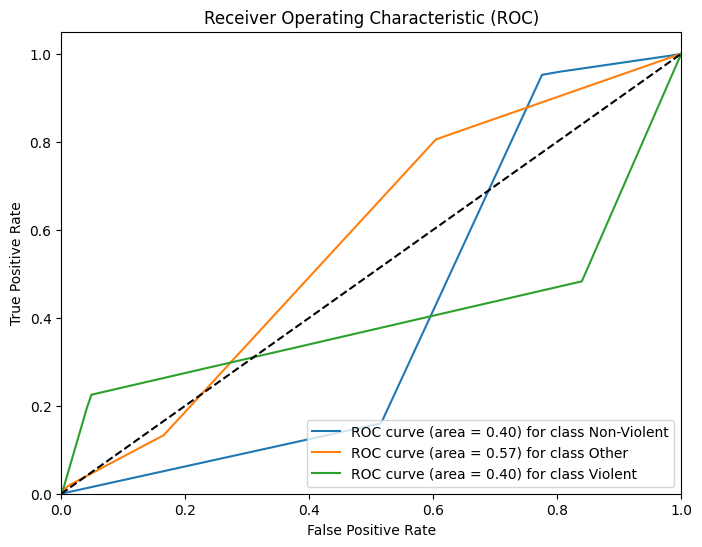

In [33]:
# import pandas as pd
# from sklearn.model_selection import train_test_split
# from sklearn.preprocessing import LabelEncoder
# from sklearn.linear_model import LogisticRegression
# from sklearn.metrics import roc_curve, auc
# import matplotlib.pyplot as plt

# # Load your dataset
# data = pd.read_csv("../src/combined_data_processed_data.csv")

# # Encode categorical variables
# label_encoders = {}
# for col in ['OFFENDER_RACE']:
#     le = LabelEncoder()
#     data[col] = le.fit_transform(data[col])
#     label_encoders[col] = le

# # Define your features and target variable
# X = data[['OFFENDER_RACE']]
# y = data['SEVERITY']  # Replace with your actual target variable

# # Split the data into training and testing sets
# X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=80)

# # Create and fit the Multinomial Logistic Regression model
# model = LogisticRegression(multi_class='multinomial', solver='lbfgs', max_iter=1000)
# model.fit(X_train, y_train)

# # Get predicted probabilities
# y_scores = model.predict_proba(X_test)

# # Calculate ROC curve and AUC for each class
# fpr = {}
# tpr = {}
# roc_auc = {}
# for i in range(model.classes_.shape[0]):
#     fpr[i], tpr[i], _ = roc_curve(y_test, y_scores[:, i], pos_label=model.classes_[i])
#     roc_auc[i] = auc(fpr[i], tpr[i])

# # Plot ROC curve
# plt.figure(figsize=(8, 6))
# for i in range(model.classes_.shape[0]):
#     plt.plot(fpr[i], tpr[i], label='ROC curve (area = %0.2f) for class %s' % (roc_auc[i], model.classes_[i]))

# plt.plot([0, 1], [0, 1], 'k--')
# plt.xlim([0.0, 1.0])
# plt.ylim([0.0, 1.05])
# plt.xlabel('False Positive Rate')
# plt.ylabel('True Positive Rate')
# plt.title('Receiver Operating Characteristic (ROC)')
# plt.legend(loc="lower right")
# plt.show()


In [37]:
data


,Unnamed: 0,INCIDENT_ID,DATA_YEAR,PUB_AGENCY_NAME,STATE_ABBR,STATE_NAME,POPULATION_GROUP_DESC,INCIDENT_DATE,TOTAL_OFFENDER_COUNT,OFFENDER_RACE,VICTIM_COUNT,OFFENSE_NAME,TOTAL_INDIVIDUAL_VICTIMS,LOCATION_NAME,BIAS_DESC,VICTIM_TYPES,SEVERITY
0,4203,2540,1991,Dallas,TX,Texas,"MSA counties from 10,000 thru 24,999",01-SEP-91,1,5,1,Simple Assault,1.0,Jail/Prison/Penitentiary/Corrections Facility,7,Individual,Violent
1,4204,2411,1991,Dallas,TX,Texas,"Cities 1,000,000 or over",25-JAN-91,3,5,1,Aggravated Assault,1.0,Parking/Drop Lot/Garage,7,Individual,Violent
2,4205,2412,1991,Dallas,TX,Texas,"Cities 1,000,000 or over",26-JAN-91,1,5,1,Intimidation,1.0,Convenience Store,1,Individual,Violent
3,4206,2413,1991,Dallas,TX,Texas,"Cities 1,000,000 or over",31-JAN-91,3,2,1,Aggravated Assault,1.0,Other/Unknown,50,Individual,Violent
4,4207,2414,1991,Dallas,TX,Texas,"Cities 1,000,000 or over",24-FEB-91,0,4,1,Destruction/Damage/Vandalism of Property,0.0,Residence/Home,7,Other,Non-Violent
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8478,218042,1054181,2020,San Antonio,TX,Texas,"Cities 1,000,000 or over",02-JUL-20,0,4,1,Intimidation,1.0,Residence/Home,7,Individual,Violent
8479,218043,1124581,2020,San Antonio,TX,Texas,"Cities 1,000,000 or over",27-SEP-20,0,4,1,Intimidation,1.0,Church/Synagogue/Temple/Mosque,32,Individual,Violent
8480,218044,1220182,2020,San Antonio,TX,Texas,"Cities 1,000,000 or over",01-OCT-20,5,2,2,Simple Assault,2.0,Highway/Road/Alley/Street/Sidewalk,49,Individual,Violent
8481,218045,1220183,2020,San Antonio,TX,Texas,"Cities 1,000,000 or over",10-OCT-20,0,4,1,Intimidation,1.0,Residence/Home,25,Individual,Violent


In [38]:
# Create a binary target variable based on mean incident count
#mean_incident_count = final_data['incident_count'].mean()
#final_data['incident_binary'] = (final_data['incident_count'] > median_incident_by_country).astype(int)
# Define predictors and target variable
logistic_X = data[['OFFENDER_RACE','BIAS_DESC','VICTIM_COUNT']]
logistic_y = data['SEVERITY']
# Scale the predictors
scaler = StandardScaler()
logistic_X_scaled = scaler.fit_transform(logistic_X)
# Create a logistic regression model
logistic_model = LogisticRegression()
# Perform k-fold cross-validation (k=5 in this example)
num_folds = 5
cross_val_scores = cross_val_score(logistic_model, logistic_X_scaled, logistic_y, cv=num_folds, scoring='accuracy')
# Print the cross-validation scores
print("Cross-Validation Scores:", cross_val_scores)
print("Mean Cross-Validation Score:", cross_val_scores.mean())

Cross-Validation Scores: [0.70418385 0.70418385 0.70418385 0.70459906 0.70459906]
Mean Cross-Validation Score: 0.704349934957361


In [46]:
#data['constant'] = 1

In [48]:
logistic_X = data[['OFFENDER_RACE','BIAS_DESC','VICTIM_COUNT',]]
logistic_y = data['SEVERITY']
# Scale the predictors
scaler = StandardScaler()
logistic_X_scaled = scaler.fit_transform(logistic_X)
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(logistic_X_scaled, logistic_y, test_size=0.2, random_state=42)
# Fit the logistic regression model
logistic_model = sm.Logit(y_train, sm.add_constant(X_train)).fit()
print(logistic_model.summary())
# Make predictions on the test set
y_pred = logistic_model.predict(sm.add_constant(X_test))
y_pred_binary = (y_pred > 0.33).astype(int)
# Evaluate the model
print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred_binary))
print("\nClassification Report:")
print(classification_report(y_test, y_pred_binary))

ValueError: endog must be in the unit interval.

In [49]:
# Define independent & dependent variable
X = data[['OFFENDER_RACE','BIAS_DESC','VICTIM_COUNT',]]
y = data['SEVERITY']
# Fit the multiple linear regression model due to having two independent variables
model = sm.OLS(y, X).fit()
# Print the summary
print(model.summary())

                                 OLS Regression Results                                
Dep. Variable:               SEVERITY   R-squared (uncentered):                   0.686
Model:                            OLS   Adj. R-squared (uncentered):              0.686
Method:                 Least Squares   F-statistic:                              6176.
Date:                Mon, 07 Aug 2023   Prob (F-statistic):                        0.00
Time:                        17:04:48   Log-Likelihood:                         -11523.
No. Observations:                8483   AIC:                                  2.305e+04
Df Residuals:                    8480   BIC:                                  2.307e+04
Df Model:                           3                                                  
Covariance Type:            nonrobust                                                  
                    coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------

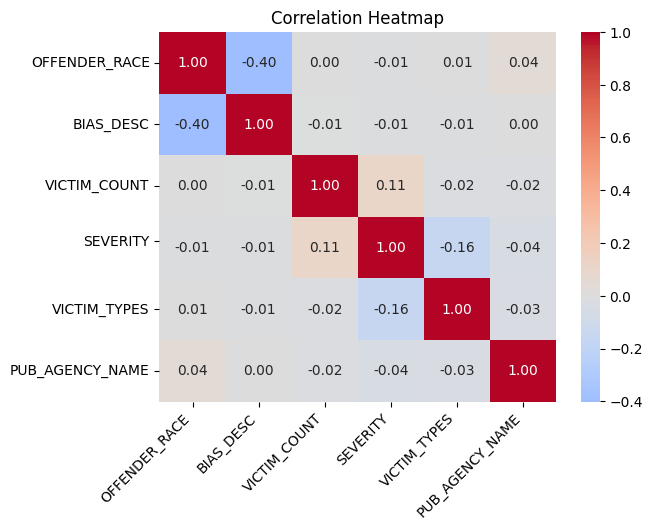

In [59]:
correlation_matrix2 = data[['OFFENDER_RACE','BIAS_DESC','VICTIM_COUNT','SEVERITY','VICTIM_TYPES','PUB_AGENCY_NAME']].corr()
sns.heatmap(correlation_matrix2, annot=True, cmap='coolwarm', center=0, fmt='.2f')
plt.title('Correlation Heatmap')
labels = ['OFFENDER_RACE','BIAS_DESC','VICTIM_COUNT','SEVERITY','VICTIM_TYPES','PUB_AGENCY_NAME']
plt.xticks(ticks=[0.5,1.5,2.5,3.5,4.5,5.5], labels=labels, rotation=45, ha='right')
plt.yticks(ticks=[0.5,1.5,2.5,3.4,4.5,5.5], labels=labels, ha='right')
plt.show()

In [61]:
# Load your dataset
data.nc = pd.read_csv("../src/nc.processed_data.csv")

# Encode categorical variables
label_encoders = {}
for col in ['OFFENDER_RACE','BIAS_DESC','SEVERITY','VICTIM_TYPES','PUB_AGENCY_NAME']:
    le = LabelEncoder()
    data.nc[col] = le.fit_transform(data.nc[col])
    label_encoders[col] = le

# Define your features and target variable
X = data.nc[['OFFENDER_RACE','BIAS_DESC']]
y = data.nc['SEVERITY']  # Replace with your actual target variable

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=99)

# Create and fit the Multinomial Logistic Regression model
model = LogisticRegression(multi_class='multinomial', solver='lbfgs', max_iter=3000)
model.fit(X_train, y_train)

# Make predictions on the test set
y_pred = model.predict(X_test)

# Evaluate the model
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.00      0.00      0.00       192
           1       0.00      0.00      0.00         3
           2       0.66      1.00      0.79       375

    accuracy                           0.66       570
   macro avg       0.22      0.33      0.26       570
weighted avg       0.43      0.66      0.52       570



c:\Users\chris\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\Users\chris\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\Users\chris\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


([<matplotlib.axis.YTick at 0x22034f9e650>,
 [Text(0, 0.5, 'OFFENDER_RACE'),
  Text(0, 1.5, 'BIAS_DESC'),
  Text(0, 2.5, 'VICTIM_COUNT'),
  Text(0, 3.4, 'SEVERITY'),
  Text(0, 4.5, 'VICTIM_TYPES'),
  Text(0, 5.5, 'PUB_AGENCY_NAME')])

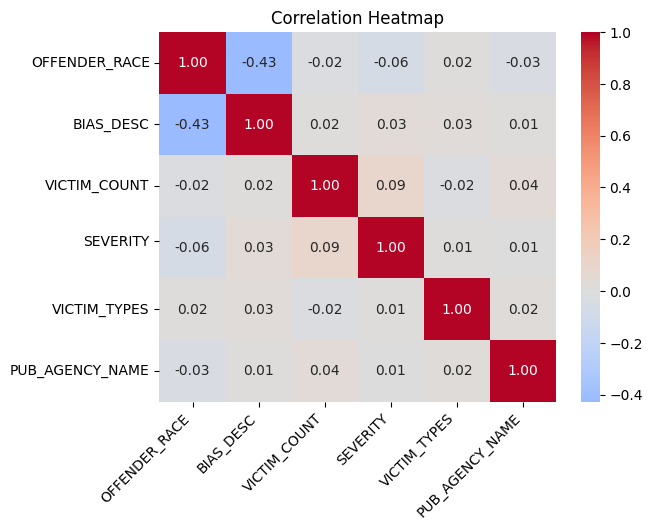

In [63]:
correlation_matrix2 = data.nc[['OFFENDER_RACE','BIAS_DESC','VICTIM_COUNT','SEVERITY','VICTIM_TYPES','PUB_AGENCY_NAME']].corr()
sns.heatmap(correlation_matrix2, annot=True, cmap='coolwarm', center=0, fmt='.2f')
plt.title('Correlation Heatmap')
labels = ['OFFENDER_RACE','BIAS_DESC','VICTIM_COUNT','SEVERITY','VICTIM_TYPES','PUB_AGENCY_NAME']
plt.xticks(ticks=[0.5,1.5,2.5,3.5,4.5,5.5], labels=labels, rotation=45, ha='right')
plt.yticks(ticks=[0.5,1.5,2.5,3.4,4.5,5.5], labels=labels, ha='right')

In [75]:
state_merge = pd.merge(data.nc, data)

In [76]:
state_merge.to_csv('merged_data.csv', index=False)
state_merge

,Unnamed: 0,INCIDENT_ID,DATA_YEAR,PUB_AGENCY_NAME,STATE_ABBR,STATE_NAME,POPULATION_GROUP_DESC,INCIDENT_DATE,TOTAL_OFFENDER_COUNT,OFFENDER_RACE,VICTIM_COUNT,OFFENSE_NAME,TOTAL_INDIVIDUAL_VICTIMS,LOCATION_NAME,BIAS_DESC,VICTIM_TYPES,SEVERITY


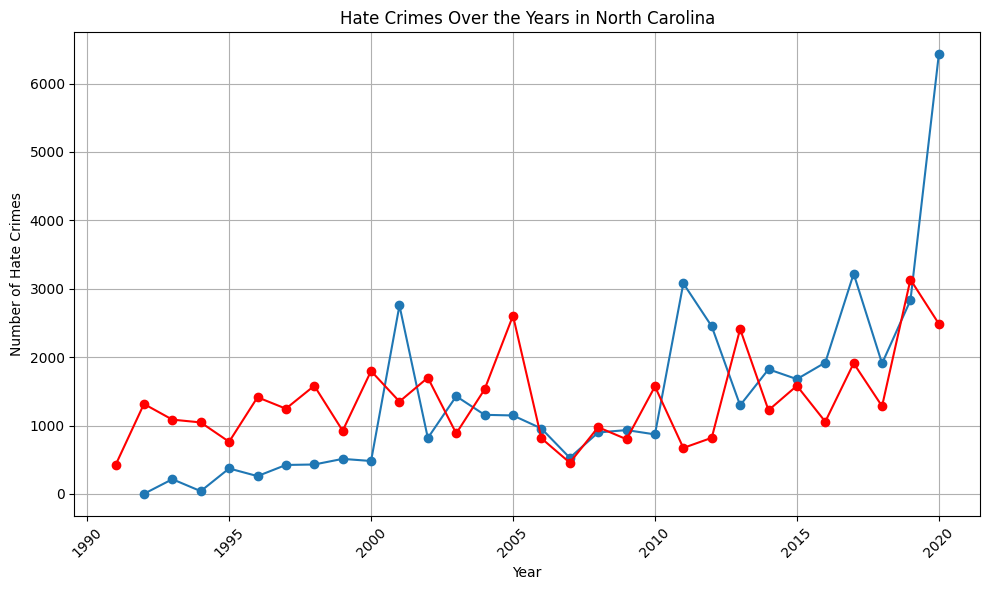

In [69]:
# Filter necessary columns
filtered_data1 = state_merge[["DATA_YEAR_x", "INCIDENT_ID_x"]]
filtered_data2 = state_merge[["DATA_YEAR_y", "INCIDENT_ID_y"]]

# Group and aggregate data
grouped_data1 = filtered_data1.groupby("DATA_YEAR_x").size()
grouped_data2 = filtered_data2.groupby("DATA_YEAR_y").size()

# Create the line chart
plt.figure(figsize=(10, 6))
plt.plot(grouped_data1.index, grouped_data1.values, marker='o')
plt.plot(grouped_data2.index, grouped_data2.values, marker='o',color = 'red')
plt.title("Hate Crimes Over the Years in North Carolina")
plt.xlabel("Year")
plt.ylabel("Number of Hate Crimes")
plt.xticks(rotation=45)
plt.grid(True)

# Show the plot
plt.tight_layout()
plt.show()

In [73]:
correlation_matrix2_merge = state_merge[['OFFENDER_RACE_x','BIAS_DESC_x','SEVERITY_x','OFFENDER_RACE_y','BIAS_DESC_y','SEVERITY_y']].corr()
sns.heatmap(correlation_matrix2, annot=True, cmap='coolwarm', center=0, fmt='.2f')
plt.title('Correlation Heatmap')
labels = ['OFFENDER_RACE','BIAS_DESC','VICTIM_COUNT','SEVERITY','VICTIM_TYPES','PUB_AGENCY_NAME']
plt.xticks(ticks=[0.5,1.5,2.5,3.5,4.5,5.5], labels=labels, rotation=45, ha='right')
plt.yticks(ticks=[0.5,1.5,2.5,3.4,4.5,5.5], labels=labels, ha='right')

KeyError: "['BIAS_DESC_x', 'SEVERITY_x', 'BIAS_DESC_y', 'SEVERITY_y'] not in index"